<a href="https://colab.research.google.com/github/yooseungjun/ML/blob/main/3%EC%9E%A5_%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B3%BC_%EB%AA%A8%EB%8D%B8_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**03-1 K-최근접 이웃 회귀**

# **정보** - **지도학습 알고리즘**
-**지도학습 알고리즘** : 회귀 + 분류
 - 분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 것
 - 회귀 : 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 것   

-**KNN(K-Nearest Neighbor) 알고리즘**
 - KNN 분류
 - KNN 회귀

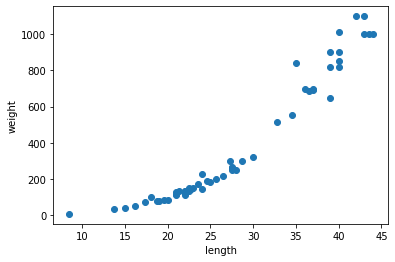

In [3]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt

"""농어의 길이만 점찍어서 관찰해보기"""
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
"""--------------------------------"""

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

```
#사이킷런에 사용할 훈련 세트는 2차원 배열 이어야 한다.
test_array = np.array([1,2,3,4])
print(test_array.shape) # (4,)
test_array = test_array.reshape(2,2)
print(test_array.shape) # (2,2)

#reshape()매서드는 지정한 크기가 원본 배열에 있는 원소의 개수와 다르면 에러
#(4,)인 배열을 (2,3)으로 만들려고 하면 오류발생
test_array = test_array.reshape(2,3) #ValueError: cannot reshape ~

#reshape()함수에 그기를 -1로 지정 -> 나머지 원소 개수로 모두 채우겠다는 의미
np.array([1,2,3,4]).shape # (4,)
np.array([1,2,3,4]).reshape(-1,1) # (4,1)
```



In [4]:
#훈련,테스트 데이터들 2차원 배열로 설정
print(train_input.shape, test_input.shape) # (42,) (14,)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape) # (42,1) (14,1)

(42,) (14,)
(42, 1) (14, 1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(train_input, train_target) #결정계수 - 0.99280

0.9698823289099254

#**정리** - **결정 계수**
score()함수 의미
 - 분류 : 정확도(테스트세트에 있는 샘플을 정확하게 분류한 개수 비율)

 - 회귀 : 결정계수($R^{2}$)
  - 범위 : 0 ~ 1
  - 1에 가까워질 수록 예측이 타겟에 가깝다
  - 0에 가까워질 수록 예측이 타겟의 평균에 가깝다  
  - 상관계수는 상관관계를 나타낸 것으로 (-1 ~ 1)값을 갖는다

In [6]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산한다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [7]:
print(knr.score(train_input,train_target)) #훈련
print(knr.score(test_input, test_target)) #테스트

0.9698823289099254
0.992809406101064


#**정리 - 과대적합 vs 과소적합**
 - 과대적합 : 훈련에서 점수가 좋았는데 테스트에서는 점수가 낮게나옴
 - 과소적합 : 훈련보다 테스트의 점수가 높거나 두 점수가 모두 낮은 경우
 - ex) 훈련:0.96  테스트:0.99  => 테스트에서 더 높으므로 과소적합

In [8]:
#이웃의 개수 3개로 설정
knr.n_neighbors = 3

#모델 다시 훈련
knr.fit(train_input,train_target)
knr.score(test_input,test_target) 
#0.9746  -> 훈련세트의 결정계수 증가

0.9746459963987609

#확인문제
 - 과대, 과소적합 이해위해 복잡한 모델과 단순한 모델 생성
 - KNN회귀 모델의 k값을 1,5,10,으로 증가시키며 훈련
 - 농어의 길이를 5에서 45까지 바꿔가며 예측한 것을 그래프로 확인

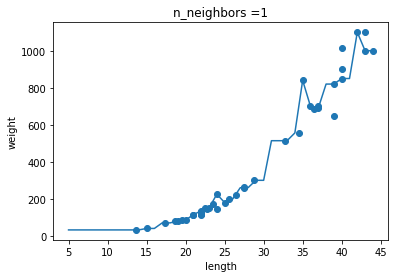

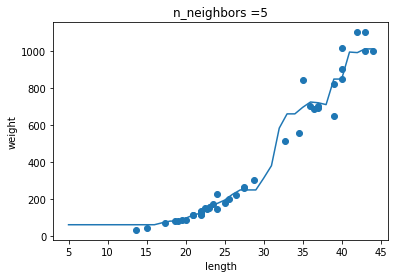

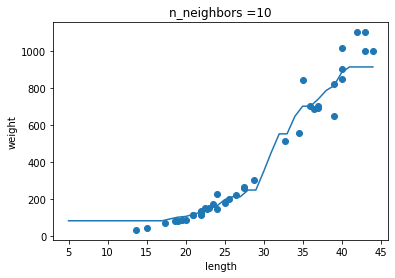

In [9]:
#k-최근접 이웃 회귀 객체 만들기
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
knr = KNeighborsRegressor()

#5에서 45까지 x좌표를 만든다
x = np.arange(5,45).reshape(-1,1)

# n = 1, 5, 10일때 예측 결과를 그래프로 그리기
for i in [1,5,10]:
  knr.n_neighbors=i
  knr.fit(train_input, train_target)
  
  #지정한 범위 x에 대한 예측 구하기
  prediction = knr.predict(x)

  #훈련세트,예측결과 그래프로 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x , prediction)
  plt.title(f'n_neighbors ={i}')
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

#**03-2 선형 회귀**

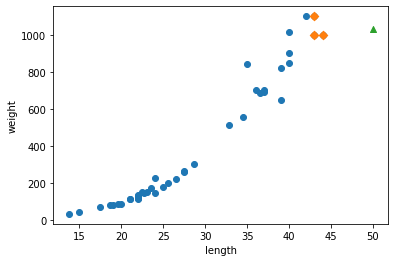

1033.3333333333333
[1033.33333333]


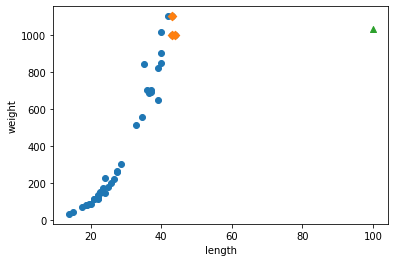

In [10]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#훈련데이터와 테스트데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42 )

#훈련, 테스트데이터 2차원 배열로 바꾸기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
knr.predict([[50]]) #1033 - 훨씬 더 많이나가는데 뭐지?

import matplotlib.pyplot as plt
#50cm 농어의 이웃 구하기
distance,  indexes = knr.kneighbors([[50]])
#훈련세트의 산점도 구하기
plt.scatter(train_input, train_target)
#훈련세트 중 이웃샘플만 다시구하기
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#주변샘플 평균내서 원래 더 큰데 작게나옴

print(np.mean(train_target[indexes])) # 50cm - 1033g 예측
print(knr.predict([[100]])) # 100cm - 1033g예측

'''100cm농어 이웃 구하기'''
distance,  indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#**정리 - 선형 회귀**
 - 편차가 가장 작게 직선을 찾는다.
 - sklearn.linear_model 패키지 LinearRegression 클래스
 - fit(), score(), predict()함수
 - 속성 : coef_(기울기), intercept_(절편)


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델 훈련
lr.fit(train_input,train_target)
#50cm 농어에 대해 예측
print(lr.predict([[50]])) #1241
#coef_(기울기), intercept_(절편)
print(lr.coef_,lr.intercept_) #[39.01] -709

[1241.83860323]
[39.01714496] -709.0186449535477


#**정리 - 정보기반학습**
- 모델파라미터 : 알고리즘이 찾은 값
- 모델 기반 학습 : 알고리즘의 훈련과정이 최적의 모델 파라미터를 찾는 것
 - ex ) 선형 회귀
- 사례 기반 학습 : 훈련세트, 사례들을 "기억"만 하는것이 훈련의 전부
 - ex ) KNN

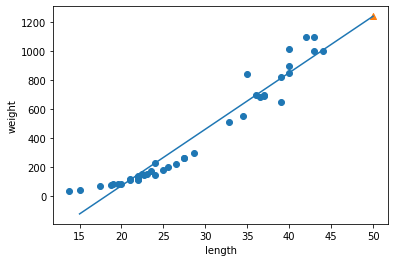

0.939846333997604
0.8247503123313558


In [12]:
#훈련세트 산점도 그리기
plt.scatter(train_input, train_target)

#15에서 50까지 1차방정식 그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+ lr.intercept_])

#50cm 농어 데이터
plt.scatter(50,1241,marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#R^2점수 예측
print(lr.score(train_input,train_target)) # 훈련 세트 - 0.939
print(lr.score(test_input,test_target)) # 테스트 세트 - 0.824

#**정리 - 다항 회귀**
 - 다항 회귀 : 선형회귀(1차)이상의 차수에 맞는 곡선 찾기
  - a X 길이$^2$  + b X 길이 + c
  - 농어의 길이를 제곱하여 원래 데이터 옆에 붙여서 진행(column_stack()함수 사용)

In [13]:
train_poly = np.column_stack( (train_input**2,train_input) )
test_poly = np.column_stack( (test_input**2, test_input) )

print(train_poly.shape, test_poly.shape) #(42,2) (14,2) - 열이 2개로 늘어남( 제곱, 제곱안한거 )
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]])) #50cm인 농어에 대해 예측해 보자 - 2차식이니까 넣을때 2500,50으로 예측 시도
print(lr.coef_,lr.intercept_) #[1.01 -21.55] 116.0  ==> [2차계수 1차계수] 절편
 

(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


#**정보 - 2차방정식 vs 선형회귀?**
 - 2차방정식은 비선형인데 왜 선형회귀라고 부르지?
 - 길이$^2$을 길이'로 치환해 선형관계로 표현 

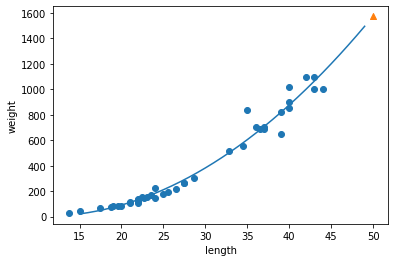

0.9706807451768623
0.9775935108325122


In [14]:
point = np.arange(15,50) #15~49들어있는 정수 배열 생성

#훈련세트의 산점도 그리기
plt.scatter(train_input,train_target)
plt.xlabel('length')
plt.ylabel('weight')

#15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point,lr.coef_[0]*point**2+lr.coef_[1]*point+lr.intercept_)

#50cm농어 데이터
plt.scatter(50,lr.coef_[0]*50**2 + lr.coef_[1]*50 + lr.intercept_ ,marker='^') # plt.scatter(50,1574)랑 똑같다
plt.show()

print(lr.score(train_poly,train_target)) # 0.97
print(lr.score(test_poly,test_target)) #0.97

#**03-3 - 특성 공학과 규제**
 - 여러 특성을 사용한 다중 회귀, 사이킷런 다양한 도구 활용
 - 과대적합 방지위한 **릿지**, **라쏘** 회귀 학습

#**정리 - 다중 회귀**
 - 다중 회귀 : 여러 개의 특성을 사용한 선형 회귀
 - 특성 공학 : 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
 
 -**판다스** - 데이터 분석 라이브러리(데이터프레임 자료형 사용)
  - 　csv 　 -> 　pd.read_ csv() 　　-> 　to_numpy()
  - csv파일 - > 판다스 데이터프레임 -> 　넘파이 배열


In [15]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy() 
#length heigt width
#[[8.4 2.11 1.41]
# [13.7 3.53 2. ]... ]

import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full,perch_weight,random_state=42
)

#**정리 - 변환기**
 - 변환기 - 사이킷런은 특성을 만들거나 전처리하기위해 다양한 클래스 제공
 - fit(), transform() 등 매서드 제공
 - LinearRegression 등의 모델 클러스는 **추정기**라고도 부른다 
 

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]]) #특성 조합을 입력
poly.transform([[2,3]]) #실제로 데이터를 변환 #[[1. 2. 3. 4. 6. 9.]]
#[2,3]이 6개의 특성을 가진 샘플 [1 2 3 4 6 9]로 변환
#PolynomiaFeatures - 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항 추가한다

"""
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]]) #[[2. 3. 4. 6. 9.]]
"""
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
train_poly.shape #l(42, 9)

poly.get_feature_names_out() # 9개의 특성이 어떻게 만들어졌는지 확인 => ['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']]
test_poly = poly.transform(test_input) 
test_poly.shape # (14, 9)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.score(train_poly,train_target) #0.9903
lr.score(test_poly,test_target) #0.9714

poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

train_poly.shape # (42, 55) #특성의 개수가 55개라는 뜻(개많노)

lr.fit(train_poly,train_target)
lr.score(train_poly,train_target) #0.9999999999991097
lr.score(test_poly,test_target) #-144.40579242684848
#훈련세트에만 과대적합되서 테스트할때 안맞는 경우 나오는것

-144.40579242684848

#**정리 - 규제**
 - **규제** : 머신러닝 모델이 훈련세트를 과도하게 학습하지 못하도록 훼방하는 것
 - 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일
 - **릿지 회귀** : 계수를 제곱한 값을 기준으로 규제
 - **라쏘 회귀** : 계수의 절댓값을 기준으로 규제를 적용
  - 규제의 양 조절 : alpha값 조절
  - alpha값 크면 규제강도 커진다.(비례)


In [37]:
# 55개 특성으로 훈련한 선형 회귀 모델의 계수를 규제
# 훈련세트의 점수를 낮추고 테스트세트의 점수늘 높히자
# 스케일이 정규화 되지 않으면 곱해지는 계수 값도 차이남
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

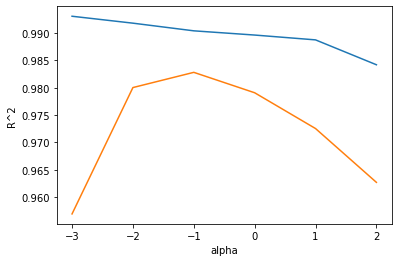

0.9827976465386884

In [53]:
#릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
ridge.score(train_scaled,train_target) #0.9896101671037343
ridge.score(test_scaled,test_target) #0.9790693977615391

import matplotlib.pyplot as plt
train_score = []
test_score = []

#alpha늘려가면서 규제의 강도도 높혀가보자
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#위가 훈련아래가 테스트
#최적의 alpha값은 -1 즉 0.1일때다
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
ridge.score(train_scaled,train_target) #0.9903815817570365
ridge.score(test_scaled,test_target) #0.9827976465386884

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


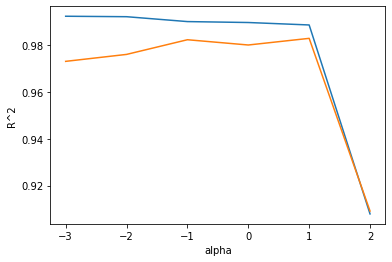

0.9888067471131867
0.9824470598706695


In [69]:
#라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)
lasso.score(train_scaled,train_target) #0.989789897208096
lasso.score(test_scaled,test_target) #0.9800593698421883

#alpha늘려가면서 규제 늘려나가보자
alpha_list= [0.001,0.01,0.1,1,10,100]
test_score=[]
train_score=[]
for alpha in alpha_list:
  lasso=Lasso(alpha=alpha,max_iter=10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score) 
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#최적의 alpha값은 1 즉 10이다.
#경고 뜨는 이유는 라쏘모델이 계수 찾기위해 반복적 계산 수행하는데 지정 반복횟수가 부족할때 경고 발생
lasso = Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target)) #0.9888067471131867
print(lasso.score(test_scaled,test_target)) #0.9824470598706695